In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving HousePricePrediction.xlsx to HousePricePrediction.xlsx


In [3]:
data = pd.read_excel('HousePricePrediction.xlsx')
data.head()


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [4]:
categorical_cols = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


numeric_cols = ['BsmtFinSF2', 'TotalBsmtSF']
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

data = data[data['SalePrice'].notnull()]


In [5]:
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [6]:
X = data_encoded.drop('SalePrice', axis=1)
y = data_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
import numpy as np

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mse)
print("Linear Regression RMSE:", rmse)



Linear Regression R²: 0.6196387511449829
Linear Regression MSE: 2917494855.2910614
Linear Regression RMSE: 54013.8394792581


In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print("Random Forest R²:", r2)
print("Random Forest MSE:", mse)
print("Random Forest RMSE:", rmse)


Random Forest R²: 0.8072248642410472
Random Forest MSE: 1478648175.9059517
Random Forest RMSE: 38453.19461248898


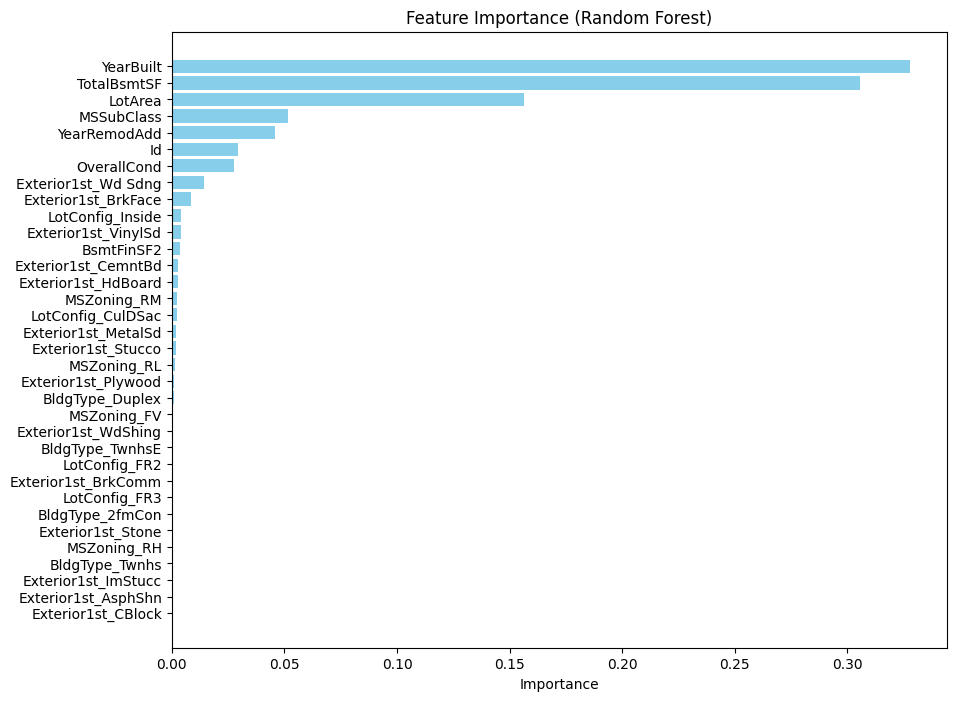

In [12]:
importance = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


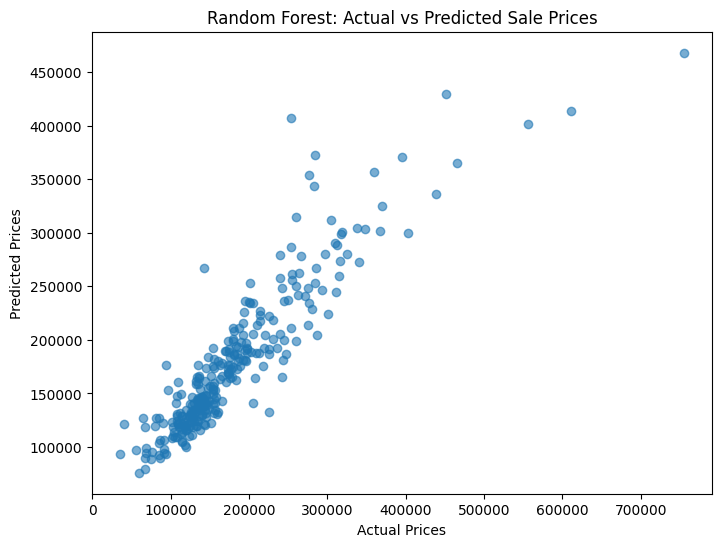

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted Sale Prices")
plt.show()


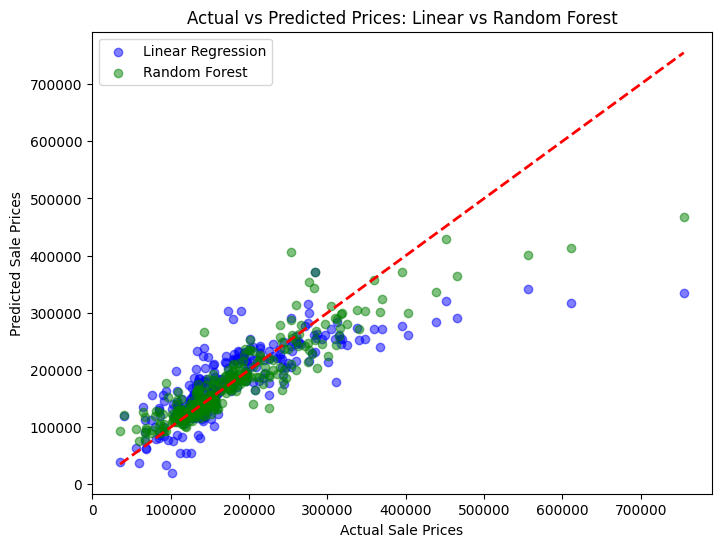

In [15]:
plt.figure(figsize=(8,6))


plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression', color='blue')

plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='green')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.title("Actual vs Predicted Prices: Linear vs Random Forest")
plt.legend()
plt.show()


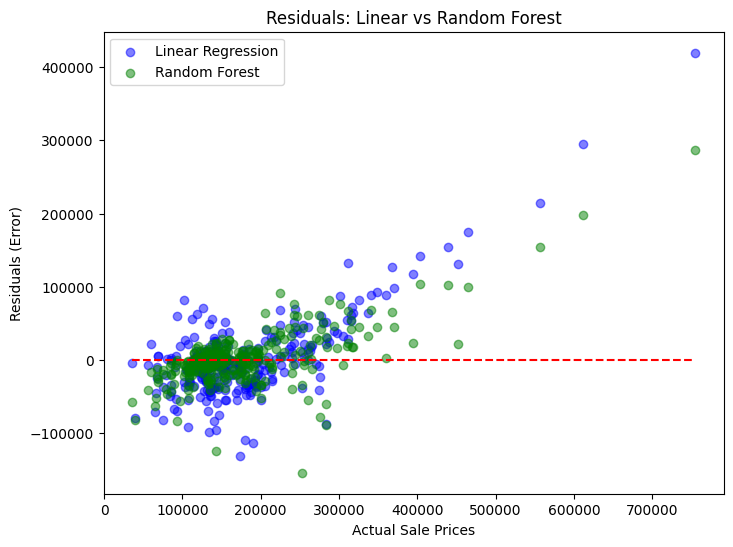

In [16]:
plt.figure(figsize=(8,6))

residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf

plt.scatter(y_test, residuals_lr, alpha=0.5, label='Linear Regression', color='blue')
plt.scatter(y_test, residuals_rf, alpha=0.5, label='Random Forest', color='green')

plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red', linestyles='dashed')
plt.xlabel("Actual Sale Prices")
plt.ylabel("Residuals (Error)")
plt.title("Residuals: Linear vs Random Forest")
plt.legend()
plt.show()


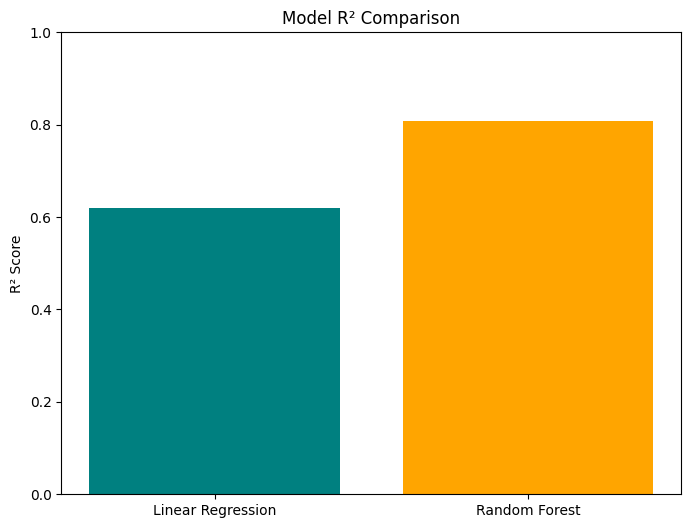

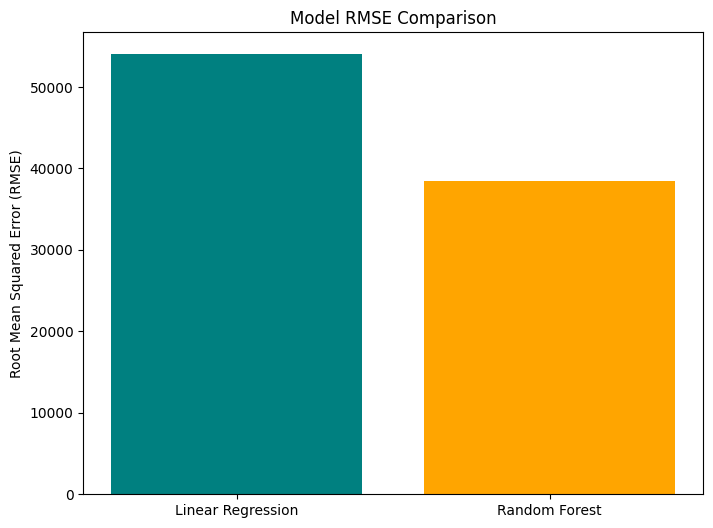

In [21]:
import matplotlib.pyplot as plt


models = ['Linear Regression', 'Random Forest']
r2_scores = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)]
mse_scores = [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_rf)]
rmse_scores = [np.sqrt(mse_scores[0]), np.sqrt(mse_scores[1])]

plt.figure(figsize=(8,6))
plt.bar(models, r2_scores, color=['teal', 'orange'])
plt.ylabel("R² Score")
plt.title("Model R² Comparison")
plt.ylim(0,1)
plt.show()


plt.figure(figsize=(8,6))
plt.bar(models, rmse_scores, color=['teal', 'orange'])
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Model RMSE Comparison")
plt.show()
